In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from scipy import stats
%matplotlib inline

In [2]:
df=pd.read_csv('train.csv', index_col=0)

In [3]:
df.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
id,,,,,,,,,,,,,,,,,,,,,
1,A,B,A,B,A,A,A,A,B,A,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
2,A,B,A,A,A,A,A,A,B,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
5,A,B,A,A,B,A,A,A,B,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
10,B,B,A,B,A,A,A,A,B,A,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
11,A,B,A,B,A,A,A,A,B,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [4]:
print(df.shape)

(188318, 131)


In [5]:
###Count missing values
sum(df.isna().sum())

0

In [6]:
df.describe()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [7]:
ca=df.iloc[:,:116]
co=df.iloc[:,116:-1]
target= np.log1p(df['loss'])

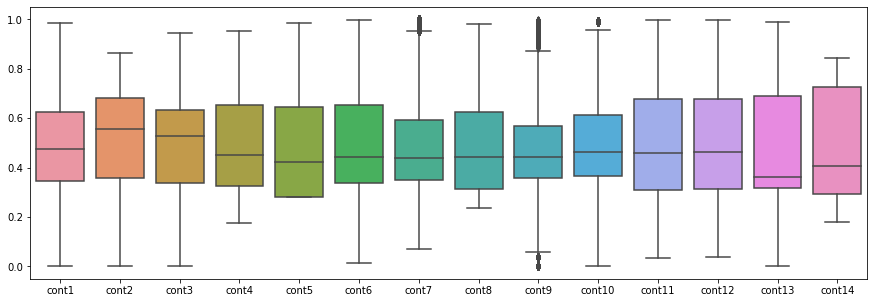

In [8]:
plt.figure(figsize=(15,5))
sns.boxplot(data=co)

Text(0.5, 0, 'log loss')

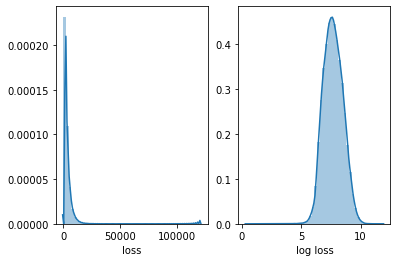

In [9]:
plt.subplot(1,2,1)
sns.distplot(df['loss'])
plt.xlabel('loss')
plt.subplot(1,2,2)
sns.distplot(target)
plt.xlabel('log loss')

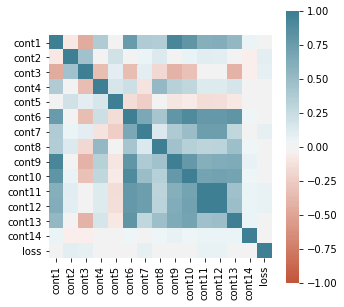

In [10]:
plt.figure(figsize=(5,5))
sns.heatmap(pd.concat([co,target], axis=1).corr(),vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)

Text(0, 0.5, 'cont12')

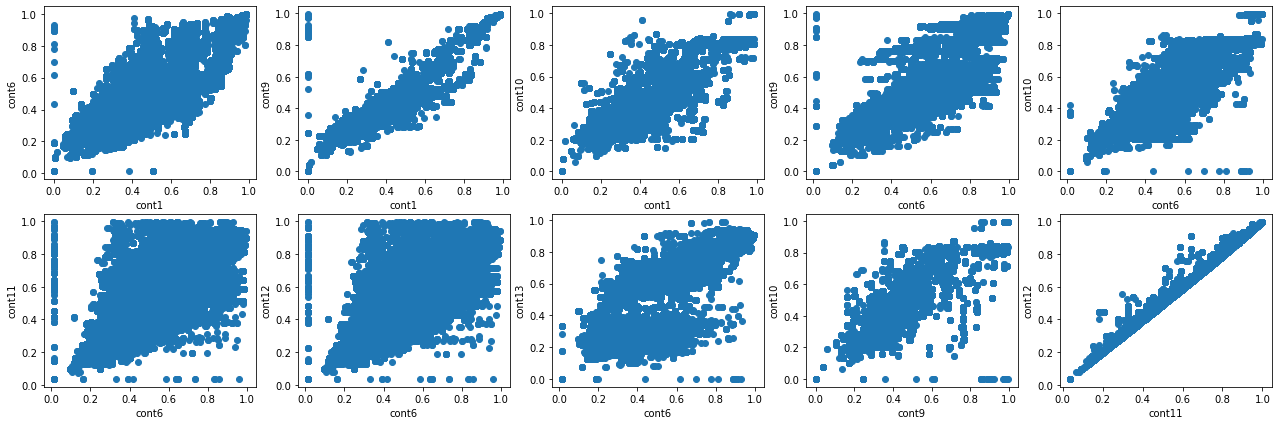

In [11]:
plt.figure(figsize=(22, 7))
plt.subplot(2,5,1)
plt.scatter(co.cont1, co.cont6)
plt.xlabel('cont1')
plt.ylabel('cont6')
plt.subplot(2,5,2)
plt.scatter(co.cont1, co.cont9)
plt.xlabel('cont1')
plt.ylabel('cont9')
plt.subplot(2,5,3)
plt.scatter(co.cont1, co.cont10)
plt.xlabel('cont1')
plt.ylabel('cont10')
plt.subplot(2,5,4)
plt.scatter(co.cont6, co.cont9)
plt.xlabel('cont6')
plt.ylabel('cont9')
plt.subplot(2,5,5)
plt.scatter(co.cont6, co.cont10)
plt.xlabel('cont6')
plt.ylabel('cont10')
plt.subplot(2,5,6)
plt.scatter(co.cont6, co.cont11)
plt.xlabel('cont6')
plt.ylabel('cont11')
plt.subplot(2,5,7)
plt.scatter(co.cont6, co.cont12)
plt.xlabel('cont6')
plt.ylabel('cont12')
plt.subplot(2,5,8)
plt.scatter(co.cont6, co.cont13)
plt.xlabel('cont6')
plt.ylabel('cont13')
plt.subplot(2,5,9)
plt.scatter(co.cont9, co.cont10)
plt.xlabel('cont9')
plt.ylabel('cont10')
plt.subplot(2,5,10)
plt.scatter(co.cont11, co.cont12)
plt.xlabel('cont11')
plt.ylabel('cont12')

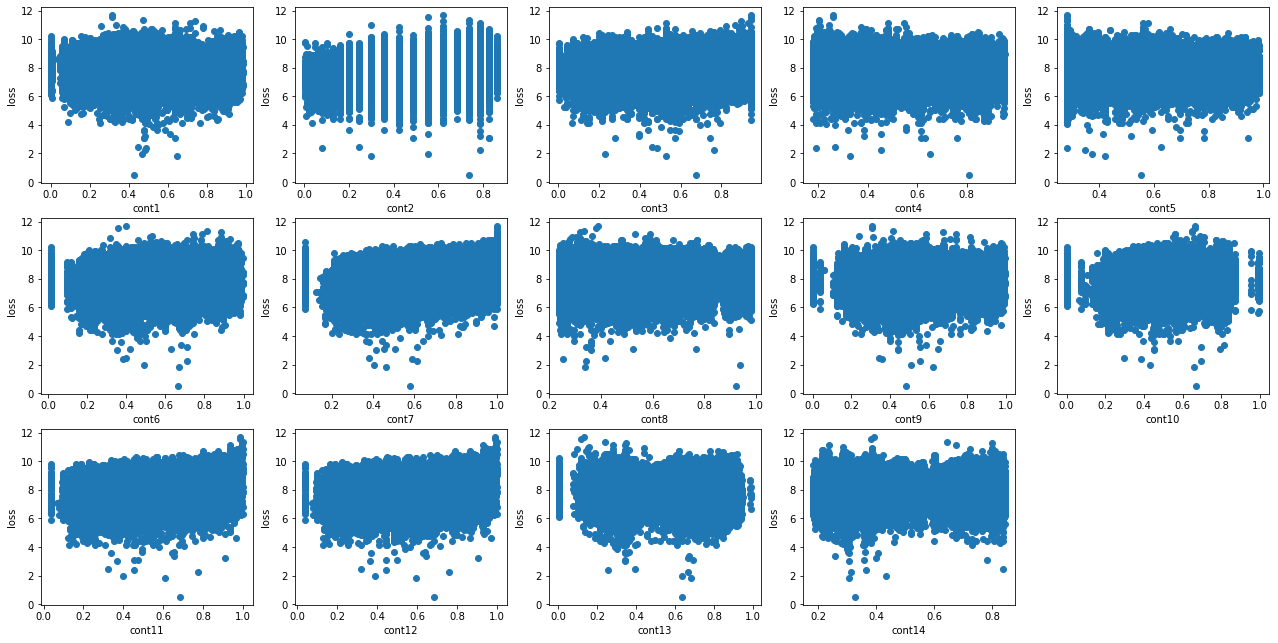

In [12]:
plt.figure(figsize=(22, 11))
plot=1
for i in co:
    plt.subplot(3,5,plot)
    plt.scatter(co[i],target)
    plt.xlabel(i)
    plt.ylabel('loss')
    plot=plot+1

In [13]:
len(pd.unique(co.cont2))

33

In [14]:
onehot_encoder = OneHotEncoder(sparse=False)
feature = onehot_encoder.fit_transform(ca)

In [15]:
feature_names = onehot_encoder.get_feature_names(ca.columns)

In [16]:
df_features=pd.DataFrame(feature, columns=feature_names, index=df.index)

In [17]:
fs = SelectKBest(score_func=f_regression, k=250)
X_fs = fs.fit_transform(df_features,target)

mask = fs.get_support() #list of booleans
new_features = [] # The list of K best features

for bool, feature in zip(mask, feature_names):
    if bool:
        new_features.append(feature)
        
df_fs= pd.DataFrame(X_fs, columns=new_features, index=df.index)
print(df_fs.head())

    cat1_A  cat1_B  cat2_A  cat2_B  cat3_A  cat3_B  cat4_A  cat4_B  cat5_A  \
id                                                                           
1      1.0     0.0     0.0     1.0     1.0     0.0     0.0     1.0     1.0   
2      1.0     0.0     0.0     1.0     1.0     0.0     1.0     0.0     1.0   
5      1.0     0.0     0.0     1.0     1.0     0.0     1.0     0.0     0.0   
10     0.0     1.0     0.0     1.0     1.0     0.0     0.0     1.0     1.0   
11     1.0     0.0     0.0     1.0     1.0     0.0     0.0     1.0     1.0   

    cat5_B  ...  cat114_I  cat114_L  cat114_N  cat114_O  cat114_R  cat114_U  \
id          ...                                                               
1      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
5      1.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
10     0.0  ...       0.0       0.0       0.0       0.0   

In [18]:
df_encoded = pd.concat([df_features,co, target], axis=1)
df_encoded.shape

(188318, 1154)

In [19]:
df_fs_encoded = pd.concat([df_fs,co, target], axis=1)
df_fs_encoded.shape

(188318, 265)

In [20]:
del df, ca, co, target, onehot_encoder, feature, feature_names, df_features, fs, X_fs, mask, new_features, df_fs

In [21]:
X = df_encoded.iloc[:,:-1]
y = df_encoded.iloc[:,-1]
X_fs = df_fs_encoded.iloc[:,:-1]
y_fs = df_fs_encoded.iloc[:,-1]
del df_encoded
del df_fs_encoded

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_fs_train, X_fs_test, y_fs_train, y_fs_test = train_test_split(X_fs, y_fs, test_size=0.2, random_state=0)
del X
del y
del X_fs
del y_fs

In [23]:
#Linear Regression for all features

regressor = LinearRegression(fit_intercept=True)  
regressor.fit(X_train, y_train)
result = regressor.predict(X_train)
result2 = regressor.predict(X_test)

from scipy import stats
print(stats.describe(result))
print(stats.describe(result2))

DescribeResult(nobs=150654, minmax=(5.625, 11.509765625), mean=7.692482793250594, variance=0.3372955055057697, skewness=0.7813947708041693, kurtosis=0.6606261657117702)
DescribeResult(nobs=37664, minmax=(-35815720799.61914, 47777738815.916016), mean=2174755.985832221, variance=1.452884502099615e+17, skewness=48.79624153023123, kurtosis=9811.028695428513)


In [24]:
print(mean_absolute_error(np.expm1(y_train), np.expm1(result)))
# Negative values in predicted result2, Linear Regression not a good model
#print(mean_absolute_error(np.expm1(y_test), np.expm1(result2)))

1232.280379342724


In [25]:
del regressor, result, result2

In [26]:
#Ridge Regression from all features

ridge = Ridge(random_state=0)  
ridge.fit(X_train, y_train)
result3 = ridge.predict(X_train)
result4 = ridge.predict(X_test)

print(mean_absolute_error(np.expm1(y_train), np.expm1(result3)))
print(mean_absolute_error(np.expm1(y_test), np.expm1(result4)))

1236.5502922105543
1258.9270631479556


In [27]:
del ridge, result3, result4

In [28]:
#Lasso for all features

lasso = Lasso(random_state=0)  
lasso.fit(X_train, y_train)
lasso_train = lasso.predict(X_train)
lasso_test = lasso.predict(X_test)

print(mean_absolute_error(np.expm1(y_train), np.expm1(lasso_train)))
print(mean_absolute_error(np.expm1(y_test), np.expm1(lasso_test)))

1810.3021493849994
1807.9291827429138


In [29]:
del lasso, lasso_train, lasso_test

In [ ]:
#Decision Tree for all features

dtr = DecisionTreeRegressor(max_depth=10,random_state=0)
dtr.fit(X_train, y_train)
result5 = dtr.predict(X_train)
result6 = dtr.predict(X_test)

print(mean_absolute_error(np.expm1(y_train), np.expm1(result5)))
print(mean_absolute_error(np.expm1(y_test), np.expm1(result6)))

In [ ]:
del dtr, result5, result6

In [32]:
#Random Forest with all features

rfr = RandomForestRegressor(max_depth=200,random_state=0, n_jobs=6)
rfr.fit(X_train, y_train)
result7 = rfr.predict(X_train)
result8 = rfr.predict(X_test)

print(mean_absolute_error(np.expm1(y_train), np.expm1(result7)))
print(mean_absolute_error(np.expm1(y_test), np.expm1(result8)))

491.6242208232324
1209.4200893990442


In [33]:
del rfr, result7, result8

In [ ]:
#XGBoost with all features

xgb = XGBRegressor(seed=0)
xgb.fit(X_train, y_train)
xgb_result1 = xgb.predict(X_train)
xgb_result2 = xgb.predict(X_test)

print(mean_absolute_error(np.expm1(y_train), np.expm1(xgb_result1)))
print(mean_absolute_error(np.expm1(y_test), np.expm1(xgb_result2)))

In [ ]:
del xgb, xgb_fs_result1, xgb_fs_result2

In [ ]:
del X_train, X_test, y_train, y_test

In [2]:
df=pd.read_csv('train.csv', index_col=0)

In [3]:
ca=df.iloc[:,:116]
co=df.iloc[:,116:-1]
target= np.log1p(df['loss'])

In [4]:
ca2 = pd.concat([ca,co.cont2], axis=1)
co2 = pd.concat([co.iloc[:,0], co.iloc[:,2:]], axis=1)

del ca, co

In [5]:
onehot_encoder = OneHotEncoder(sparse=False)
feature = onehot_encoder.fit_transform(ca2)
feature_names = onehot_encoder.get_feature_names(ca2.columns)
df_features=pd.DataFrame(feature, columns=feature_names, index=df.index)

fs = SelectKBest(score_func=f_regression, k=112)
X_fs = fs.fit_transform(df_features,target)

mask = fs.get_support() #list of booleans
new_features = [] # The list of K best features

for bool, feature in zip(mask, feature_names):
    if bool:
        new_features.append(feature)
        
df_fs= pd.DataFrame(X_fs, columns=new_features, index=df.index)
print(df_fs.head())

    cat1_A  cat1_B  cat2_A  cat2_B  cat3_A  cat3_B  cat4_A  cat4_B  cat5_A  \
id                                                                           
1      1.0     0.0     0.0     1.0     1.0     0.0     0.0     1.0     1.0   
2      1.0     0.0     0.0     1.0     1.0     0.0     1.0     0.0     1.0   
5      1.0     0.0     0.0     1.0     1.0     0.0     1.0     0.0     0.0   
10     0.0     1.0     0.0     1.0     1.0     0.0     0.0     1.0     1.0   
11     1.0     0.0     0.0     1.0     1.0     0.0     0.0     1.0     1.0   

    cat5_B  ...  cat103_D  cat103_E  cat103_F  cat111_A  cat111_G  cat111_I  \
id          ...                                                               
1      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2      0.0  ...       0.0       0.0       0.0       1.0       0.0       0.0   
5      1.0  ...       0.0       0.0       0.0       1.0       0.0       0.0   
10     0.0  ...       0.0       0.0       0.0       0.0   

In [6]:
df_encoded = pd.concat([df_features,co2, target], axis=1)
print(df_encoded.shape)

df_fs_encoded = pd.concat([df_fs,co2, target], axis=1)
print(df_fs_encoded.shape)

del df, ca2, co2, target, onehot_encoder, feature, feature_names, df_features, fs, X_fs, mask, new_features, df_fs

(188318, 1186)
(188318, 126)


In [7]:
X = df_encoded.iloc[:,:-1]
y = df_encoded.iloc[:,-1]
X_fs = df_fs_encoded.iloc[:,:-1]
y_fs = df_fs_encoded.iloc[:,-1]

del df_encoded
del df_fs_encoded

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_fs_train, X_fs_test, y_fs_train, y_fs_test = train_test_split(X_fs, y_fs, test_size=0.2, random_state=0)
del X
del y
del X_fs
del y_fs

In [9]:
#XGBoost with all features

xgb = XGBRegressor(seed=0)
xgb.fit(X_train, y_train)
xgb_result1 = xgb.predict(X_train)
xgb_result2 = xgb.predict(X_test)

print(mean_absolute_error(np.expm1(y_train), np.expm1(xgb_result1)))
print(mean_absolute_error(np.expm1(y_test), np.expm1(xgb_result2)))

1087.2149013243866
1175.85658554048


In [10]:
#XGBoost with select features

xgb = XGBRegressor(seed=0)
xgb.fit(X_fs_train, y_fs_train)
xgb_fs_result1 = xgb.predict(X_fs_train)
xgb_fs_result2 = xgb.predict(X_fs_test)


print(mean_absolute_error(np.expm1(y_fs_train), np.expm1(xgb_fs_result1)))
print(mean_absolute_error(np.expm1(y_fs_test), np.expm1(xgb_fs_result2)))

1094.717693106477
1185.9212895100868


In [63]:
#XGBoost with select features

xgb = XGBRegressor(seed=0)
params = {#'lamda': [.6,.8,1,1.2],
          'alpha':[0,0.2,.4]
          ,'max_depth': [5,6,7]
         ,'gamma': [1,2,3]
         ,'eta': [.25,.3,.35]
          #,'min_child_weight': [0,.1,.2]
          #'subsample': [1,.9,.8],
          #'colsample_bytree': [1,.9,.8]    
         }
clf = GridSearchCV(xgb, params, scoring='neg_mean_absolute_error', cv = 5)
clf.fit(X_fs_train, y_fs_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, seed=0,
                                    subsample=None, tree_method=None,
     

In [64]:
xgb_result1 = clf.predict(X_fs_train)
xgb_result2 = clf.predict(X_fs_test)

print(mean_absolute_error(np.expm1(y_fs_train), np.expm1(xgb_result1)))
print(mean_absolute_error(np.expm1(y_fs_test), np.expm1(xgb_result2)))

1099.129570997514
1185.0239042456149


In [65]:
clf.cv_results_

{'mean_fit_time': array([5.66846399, 7.08383427, 8.16570497, 6.33047266, 7.63306284,
        8.84743099, 6.0885519 , 7.37093844, 9.35218744, 6.38466196,
        7.31539464, 9.49360094, 6.59179235, 7.71336346, 8.0986505 ,
        5.90568528, 7.03101358, 7.99657493, 5.90331173, 7.25961571,
        8.27545924, 6.11417522, 7.0690084 , 8.04770207, 6.01287141,
        7.17109866, 8.20668387, 5.983672  , 7.08428473, 8.4998765 ,
        6.13715034, 7.33495007, 8.44581614, 6.04785318, 7.10162168,
        8.08814907, 6.05284009, 7.12410779, 8.34025407, 5.88163238,
        7.06298723, 8.41467981, 6.34054432, 7.47122889, 8.62336001,
        6.21529269, 7.03120313, 8.16336622, 5.93485537, 6.9764256 ,
        8.06081705, 5.86108074, 6.95596828, 8.0262836 , 5.94652586,
        7.05237379, 8.19284596, 5.92622967, 7.04198842, 8.12898712,
        5.90955935, 6.96088653, 8.0627409 , 6.17410707, 7.05642886,
        8.2259799 , 5.90920429, 7.09701519, 8.31226315, 5.92804523,
        7.05930915, 8.39042845,

In [66]:
clf.best_params_

{'alpha': 0, 'eta': 0.25, 'gamma': 2, 'max_depth': 7}

In [60]:
#XGBoost with select features

xgb = XGBRegressor(seed=0, max_depth = 6
                  , gamma = 2
                   , alpha = 0.2
                   , min_child_weight = 0
                   , eta=0.3
                  )
xgb.fit(X_fs_train, y_fs_train)
xgb_fs_result1 = xgb.predict(X_fs_train)
xgb_fs_result2 = xgb.predict(X_fs_test)


print(mean_absolute_error(np.expm1(y_fs_train), np.expm1(xgb_fs_result1)))
print(mean_absolute_error(np.expm1(y_fs_test), np.expm1(xgb_fs_result2)))

1120.3481619030024
1189.54849226113


In [15]:
#XGBoost with select features

xgb = XGBRegressor(seed=0, max_depth = 7
                  , gamma = 2
                   , alpha = 0                   
                   , eta=0.25
                  )
xgb.fit(X_fs_train, y_fs_train)
xgb_fs_result1 = xgb.predict(X_fs_train)
xgb_fs_result2 = xgb.predict(X_fs_test)


print(mean_absolute_error(np.expm1(y_fs_train), np.expm1(xgb_fs_result1)))
print(mean_absolute_error(np.expm1(y_fs_test), np.expm1(xgb_fs_result2)))

1099.129570997514
1185.0239042456149


In [12]:
np.expm1(y_fs_train).describe()

count    150654.000000
mean       3036.495648
std        2902.463342
min           0.670000
25%        1201.552500
50%        2115.815000
75%        3865.802500
max      121012.250000
Name: loss, dtype: float64

In [13]:
np.expm1(y_fs_test).describe()

count    37664.000000
mean      3040.705791
std       2910.604589
min          8.400000
25%       1215.612500
50%       2114.150000
75%       3857.495000
max      79623.520000
Name: loss, dtype: float64

In [28]:
(np.expm1(y_fs_train) - np.expm1(xgb_fs_result1)).describe()

count    150654.000000
mean        372.341732
std        1775.755587
min      -39026.533750
25%        -526.625206
50%          17.059197
75%         893.831984
max       65988.949219
Name: loss, dtype: float64

In [27]:
np.expm1(y_fs_train)

id
455847      696.88
326082     1561.54
122105     7438.60
469398     3385.69
32310      2982.58
            ...   
474874     2447.34
552354    11608.00
368601     2011.52
542029     1654.42
136774     6380.34
Name: loss, Length: 150654, dtype: float64

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 2.0000e+00, 8.0000e+00, 1.6000e+01,
        4.0000e+01, 8.3000e+01, 2.0200e+02, 6.5100e+02, 2.1000e+03,
        9.1660e+03, 5.0062e+04, 5.0254e+04, 1.9449e+04, 8.8900e+03,
        4.2920e+03, 2.2350e+03, 1.1920e+03, 7.0500e+02, 4.4100e+02,
        2.8500e+02, 1.9000e+02, 1.0900e+02, 8.7000e+01, 4.1000e+01,
        3.6000e+01, 3.0000e+01, 1.9000e+01, 1.8000e+01, 1.7000e+01,
        5.0000e+00, 1.0000e+00, 4.0000e+00, 2.0000e+00, 1.0000e+00,
        4.0000e+00, 3.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.00

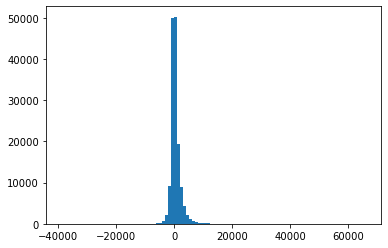

In [30]:
plt.hist(np.expm1(y_fs_train) - np.expm1(xgb_fs_result1), bins=100)

(array([3.8130e+04, 4.6305e+04, 2.5161e+04, 1.4848e+04, 9.1380e+03,
        5.8820e+03, 3.5870e+03, 2.4090e+03, 1.5890e+03, 1.0970e+03,
        7.2500e+02, 4.9000e+02, 3.5500e+02, 2.5900e+02, 1.5800e+02,
        1.2800e+02, 8.9000e+01, 7.7000e+01, 5.0000e+01, 3.6000e+01,
        3.3000e+01, 2.8000e+01, 1.5000e+01, 9.0000e+00, 8.0000e+00,
        9.0000e+00, 5.0000e+00, 3.0000e+00, 5.0000e+00, 2.0000e+00,
        4.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00,
        0.0000e+00, 4.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.00

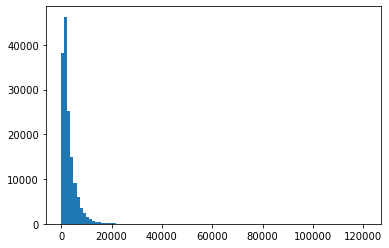

In [31]:
plt.hist(np.expm1(y_fs_train), bins=100)